# MulticlassClassification
Im Gegensatz zu der Binary-Classification werden nun mehrer mögliche Output-Klassen klassifiziert 

## Beispiel-Algorithmen

hierbei gibt es zwei Möglichkeiten
* Modelle die Multiclass "out-of-the-Box" können
    * Bsp:
        * RF
        * NaiveBayes
    
    
* Binäre Classiifier, welche derart modifizert wurden, sodass Multiclass geht (
    * Ansatz 1, im BSP MNIST 10 Classifier und dann ensemble => der mit dem höchsten Score erhält die Klassifikation (OVA)
    * ANsatz 2, für jedes Zahlenpaar eine Klassikation (0|1),(0|2)...(8|9)(OVO)
        * OVA erheblich Ressourcen schonender als OVO
    * Bsp:
        * SVM
        * Linear Classifier
    
   

In [17]:
# Bibliotheken
from mlxtend.data import loadlocal_mnist # für das Laden der Train & Testdaten
import numpy as np
from sklearn.linear_model import SGDClassifier # Stocastical Gradient Descent Classifier
from sklearn.ensemble import RandomForestClassifier # Random-Forrest-Classifier
from sklearn.linear_model import LogisticRegression # Logistische Regression


import matplotlib.pyplot as plt
from sklearn.externals import joblib # Model Rausspeichern
import pandas as pd


In [18]:
# Laden der Daten
train_X, train_y = loadlocal_mnist(
        images_path='./Data/train-images.idx3-ubyte', 
        labels_path='./Data/train-labels.idx1-ubyte')

test_X, test_y = loadlocal_mnist(
        images_path='./Data/t10k-images.idx3-ubyte', 
        labels_path='./Data/t10k-labels.idx1-ubyte')

# BspImages
Die Bilder kommen noch aus dem initialen Notebook. Von diesen Kenne ich die Labels

In [19]:
# Test mit meinen Beispielimages
# kommend aus dem ersten Notebook Basics, hier meine test-imgs
bspImgs = [3,9,50,5001,3490]
# das sind [1,4,3,3,0] 
bspImg = bspImgs[0]


# ab Hier die Modellierung
## SGD-Classifier Extended to Multiclass
! vgl mit Binary-Classifier, jetzt werden alle Klassen, und nicht nur die 5 als train_y gewählt. Hier wird automatisch ein OVA, erstellt. Unten erkläre ich wie man ein OVO erzwingt. 

In [20]:
sgd_clf = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)
sgd_clf.fit(train_X, train_y) 
sgd_clf.predict([train_X[4]])

array([9], dtype=uint8)

## Prüfen des soeben erstellten Classifiers mit den mir bekannten BSPImages

In [21]:
for currentExamplePicture in range(0, len(bspImgs),1):
    print(sgd_clf.predict([train_X[bspImgs[currentExamplePicture]]]))
    
# Output passt mit dem was ich ursprünglich im  gecheckt hatte

[1]
[4]
[3]
[3]
[0]


## Check die Scores von einem einzigen Bild
Somit kann ich sagen welches bild am ehesten zutrifft

[[-591440.62376883   69425.74205759  -53233.77796119 -133202.0284238
  -264386.81519259 -385956.12301055 -292795.13951332 -338264.17025273
   -96076.58907387 -349142.42780857]]


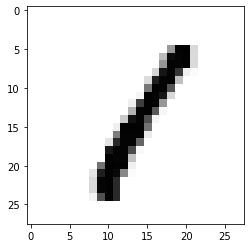

In [22]:
some_digit_scores = sgd_clf.decision_function([train_X[bspImg]])
print(some_digit_scores)
img = train_X[bspImg].reshape((28,28))
plt.imshow(img, cmap="Greys")
plt.show()

## Interpreation
in den oberen Code-Blöcken habe ich für ein Bild das offensichtlich 1 darstellt oben drüber die Ergebnisse von 10 Binären Classifier, bei der 1 ist der Score am höchsten. Ergo klassifiziert im Multiclass-Segment der SGD das Bild als Klasse "1"

In [23]:
# Möglichkeit OVO zu "forcen"
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(train_X, train_y)

OneVsOneClassifier(estimator=SGDClassifier(alpha=0.0001, average=False,
                                           class_weight=None,
                                           early_stopping=False, epsilon=0.1,
                                           eta0=0.0, fit_intercept=True,
                                           l1_ratio=0.15,
                                           learning_rate='optimal',
                                           loss='hinge', max_iter=1000,
                                           n_iter_no_change=5, n_jobs=None,
                                           penalty='l2', power_t=0.5,
                                           random_state=42, shuffle=True,
                                           tol=0.001, validation_fraction=0.1,
                                           verbose=0, warm_start=False),
                   n_jobs=None)

In [24]:
for currentExamplePicture in range(0, len(bspImgs),1):
    print(ovo_clf.predict([train_X[bspImgs[currentExamplePicture]]]))
print(len(ovo_clf.estimators_))

[1]
[4]
[3]
[3]
[0]
45


# Logistische Rgression

In [9]:
logReg_clf = LogisticRegression(C=1e5)
logReg_clf.fit(train_X, train_y) 

C:\Users\1810837475\.conda\envs\Kompensationsarbeit\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
# Ähnlich wie oben beim SGD hier die Testbilder
for currentExamplePicture in range(0, len(bspImgs),1):
    print(logReg_clf.predict([train_X[bspImgs[currentExamplePicture]]]))

[1]
[4]
[3]
[3]
[0]


# RF-Classifier

In [11]:
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(train_X, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [12]:
for currentExamplePicture in range(0, len(bspImgs),1):
    print(forest_clf.predict([train_X[bspImgs[currentExamplePicture]]]))

[1]
[4]
[3]
[3]
[0]


Random Forrest hat weder OVO noch OVA, da RF das automatisch bereits kann,dennoch können wir uns die P je Klasse anzeigen lassen

In [13]:
for currentExamplePicture in range(0, len(bspImgs),1):
    print(forest_clf.predict_proba([train_X[bspImgs[currentExamplePicture]]]))

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0.   0.   0.   0.   0.98 0.01 0.   0.01 0.   0.  ]]
[[0.01 0.   0.   0.97 0.   0.02 0.   0.   0.   0.  ]]
[[0.   0.   0.   0.89 0.   0.06 0.   0.01 0.03 0.01]]
[[0.99 0.   0.01 0.   0.   0.   0.   0.   0.   0.  ]]


# Modelle speichern

In [14]:
# Speichern der Modelle
joblib.dump(sgd_clf, "./MODEL/MNIST_MultiClassClassifier_sgd_clf.pkl")
joblib.dump(forest_clf, "./MODEL/MNIST_MultiClassClassifier_forest_clf.pkl")
joblib.dump(logReg_clf, "./MODEL/MNIST_MultiClassClassifier_logReg_clf.pkl")


['./MODEL/MNIST_MultiClassClassifier_logReg_clf.pkl']

Die grundsäztliche Evaluierung findet in [hier](./999_EvaluationOfAllModels.ipynb) statt.